<a href="https://colab.research.google.com/github/johnjkiran/TSAI/blob/master/S9/S9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [23]:
from importlib.machinery import SourceFileLoader
from os.path import join
config = SourceFileLoader('config',join('/content/drive/My Drive/Colab Notebooks/S9','config.py')).load_module()
from config import ModelConfig
# View model config
args = ModelConfig()
args.print_config()

print()
# CUDA?
#cuda = torch.cuda.is_available()
#print("CUDA Available?", cuda)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout': 0.2,
  'epochs': 20,
  'l1_decay': 3e-06,
  'l2_decay': 0.001,
  'lr': 0.2,
  'max_lr': 0.01,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1}



In [0]:
utils = SourceFileLoader('utils',join('/content/drive/My Drive/Colab Notebooks/S9','utils.py')).load_module()
from utils import *

In [8]:
#!pip install albumentations==0.4.5
cifar_file = SourceFileLoader('cifar_file',join('/content/drive/My Drive/Colab Notebooks/S9','cifar_file.py')).load_module()
from cifar_file import DataEngine
data = DataEngine(args)

Files already downloaded and verified
Files already downloaded and verified


plane  ship   car   cat


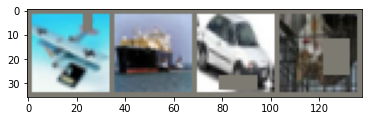

In [26]:
# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [0]:
resnet = SourceFileLoader('resnet',join('/content/drive/My Drive/Colab Notebooks/S9','resnet.py')).load_module()
from resnet import ResNet18

In [10]:
device = which_device()
net = ResNet18(args.dropout)
model = net.to(device)
show_model_summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
train = SourceFileLoader('train',join('/content/drive/My Drive/Colab Notebooks/S9','train.py')).load_module()
from train import train
test = SourceFileLoader('test',join('/content/drive/My Drive/Colab Notebooks/S9','test.py')).load_module()
from test import test

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
scheduler = OneCycleLR(optimizer, max_lr=args.max_lr, epochs=args.epochs,
                       steps_per_epoch=len(data.train_loader))

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, scheduler)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs,
           misclassified_imgs, correct_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs, correct_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs, correct_imgs = run(l1_decay=args.l1_decay, l2_decay=args.l2_decay)


  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


L2_loss=458.9210205078125 L1_loss=109222.875 Loss=2.1424851417541504 Batch_id=781 Accuracy=37.56: 100%|██████████| 782/782 [01:12<00:00, 10.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0220, Accuracy: 4979/10000 (49.79%)

EPOCH: 2


L2_loss=459.3481140136719 L1_loss=108896.390625 Loss=1.9992196559906006 Batch_id=781 Accuracy=50.88: 100%|██████████| 782/782 [01:15<00:00, 10.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0177, Accuracy: 5911/10000 (59.11%)

EPOCH: 3


L2_loss=460.099365234375 L1_loss=108454.6015625 Loss=1.5164108276367188 Batch_id=781 Accuracy=58.67: 100%|██████████| 782/782 [01:15<00:00, 10.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 6488/10000 (64.88%)

EPOCH: 4


L2_loss=460.8474426269531 L1_loss=107890.8984375 Loss=1.4526385068893433 Batch_id=781 Accuracy=64.36: 100%|██████████| 782/782 [01:15<00:00, 10.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0135, Accuracy: 6995/10000 (69.95%)

EPOCH: 5


L2_loss=461.2833557128906 L1_loss=107207.2109375 Loss=2.1501991748809814 Batch_id=781 Accuracy=68.30: 100%|██████████| 782/782 [01:15<00:00, 10.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0162, Accuracy: 6631/10000 (66.31%)

EPOCH: 6


L2_loss=461.5740966796875 L1_loss=106512.6328125 Loss=2.1918389797210693 Batch_id=781 Accuracy=71.29: 100%|██████████| 782/782 [01:15<00:00, 10.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0115, Accuracy: 7489/10000 (74.89%)

EPOCH: 7


L2_loss=461.5014343261719 L1_loss=105758.5546875 Loss=1.4449373483657837 Batch_id=781 Accuracy=74.01: 100%|██████████| 782/782 [01:15<00:00, 10.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0119, Accuracy: 7504/10000 (75.04%)

EPOCH: 8


L2_loss=461.1614074707031 L1_loss=104996.46875 Loss=1.7214686870574951 Batch_id=781 Accuracy=75.70: 100%|██████████| 782/782 [01:15<00:00, 10.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 7882/10000 (78.82%)

EPOCH: 9


L2_loss=460.7531433105469 L1_loss=104232.4375 Loss=1.2654554843902588 Batch_id=781 Accuracy=77.43: 100%|██████████| 782/782 [01:15<00:00, 10.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0127, Accuracy: 7358/10000 (73.58%)

EPOCH: 10


L2_loss=460.2128601074219 L1_loss=103511.9453125 Loss=1.7375237941741943 Batch_id=781 Accuracy=78.72: 100%|██████████| 782/782 [01:15<00:00, 10.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 7845/10000 (78.45%)

EPOCH: 11


L2_loss=459.5156555175781 L1_loss=102809.1875 Loss=1.1977782249450684 Batch_id=781 Accuracy=79.78: 100%|██████████| 782/782 [01:15<00:00, 10.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 8084/10000 (80.84%)

EPOCH: 12


L2_loss=458.7880554199219 L1_loss=102111.390625 Loss=1.5794256925582886 Batch_id=781 Accuracy=81.23: 100%|██████████| 782/782 [01:15<00:00, 10.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8255/10000 (82.55%)

EPOCH: 13


L2_loss=457.93304443359375 L1_loss=101428.8515625 Loss=1.3583641052246094 Batch_id=781 Accuracy=82.27: 100%|██████████| 782/782 [01:16<00:00, 10.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8249/10000 (82.49%)

EPOCH: 14


L2_loss=457.02044677734375 L1_loss=100772.46875 Loss=1.3899133205413818 Batch_id=781 Accuracy=83.39: 100%|██████████| 782/782 [01:15<00:00, 10.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8294/10000 (82.94%)

EPOCH: 15


L2_loss=456.0565490722656 L1_loss=100153.6953125 Loss=0.8593752384185791 Batch_id=781 Accuracy=84.81: 100%|██████████| 782/782 [01:15<00:00, 10.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 71 %
Accuracy of   cat : 72 %
Accuracy of  deer : 84 %
Accuracy of   dog : 80 %
Accuracy of  frog : 80 %
Accuracy of horse : 89 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0065, Accuracy: 8542/10000 (85.42%)

EPOCH: 16


L2_loss=455.10626220703125 L1_loss=99580.9453125 Loss=1.1583338975906372 Batch_id=781 Accuracy=86.15: 100%|██████████| 782/782 [01:15<00:00, 10.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 98 %
Accuracy of  bird : 68 %
Accuracy of   cat : 71 %
Accuracy of  deer : 89 %
Accuracy of   dog : 74 %
Accuracy of  frog : 90 %
Accuracy of horse : 92 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0064, Accuracy: 8591/10000 (85.91%)

EPOCH: 17


L2_loss=454.2689208984375 L1_loss=99104.5234375 Loss=0.8981542587280273 Batch_id=781 Accuracy=87.55: 100%|██████████| 782/782 [01:15<00:00, 10.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 71 %
Accuracy of  deer : 84 %
Accuracy of   dog : 69 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0058, Accuracy: 8735/10000 (87.35%)

EPOCH: 18


L2_loss=453.6916809082031 L1_loss=98771.4453125 Loss=0.9089827537536621 Batch_id=781 Accuracy=89.01: 100%|██████████| 782/782 [01:15<00:00, 10.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 98 %
Accuracy of  bird : 80 %
Accuracy of   cat : 61 %
Accuracy of  deer : 91 %
Accuracy of   dog : 67 %
Accuracy of  frog : 96 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0058, Accuracy: 8756/10000 (87.56%)

EPOCH: 19


L2_loss=453.41009521484375 L1_loss=98615.4609375 Loss=1.2632827758789062 Batch_id=781 Accuracy=89.93: 100%|██████████| 782/782 [01:15<00:00, 10.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 93 %
Accuracy of  bird : 94 %
Accuracy of   cat : 75 %
Accuracy of  deer : 80 %
Accuracy of   dog : 79 %
Accuracy of  frog : 86 %
Accuracy of horse : 91 %
Accuracy of  ship : 98 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0054, Accuracy: 8812/10000 (88.12%)

EPOCH: 20


L2_loss=453.3618469238281 L1_loss=98589.546875 Loss=1.1816856861114502 Batch_id=781 Accuracy=90.50: 100%|██████████| 782/782 [01:15<00:00, 10.32it/s]



Accuracy of plane : 87 %
Accuracy of   car : 98 %
Accuracy of  bird : 77 %
Accuracy of   cat : 75 %
Accuracy of  deer : 80 %
Accuracy of   dog : 73 %
Accuracy of  frog : 82 %
Accuracy of horse : 98 %
Accuracy of  ship : 90 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0054, Accuracy: 8823/10000 (88.23%)



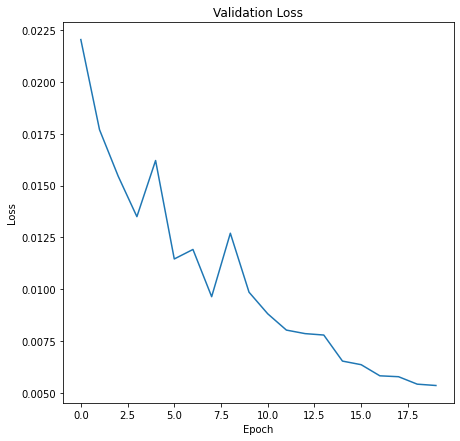

In [14]:
results = SourceFileLoader('results',join('/content/drive/My Drive/Colab Notebooks/S9','results.py')).load_module()
from results import plot_images, plot_graph
plot_graph(test_losses, "Loss")

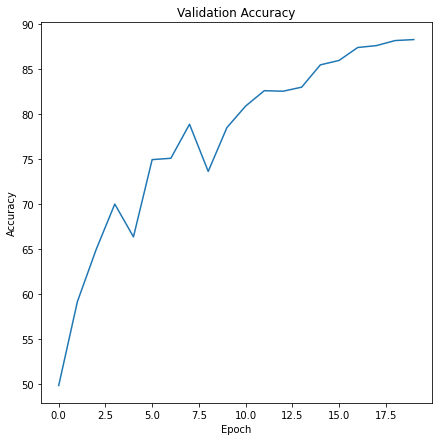

In [15]:
plot_graph(test_accs, "Accuracy")

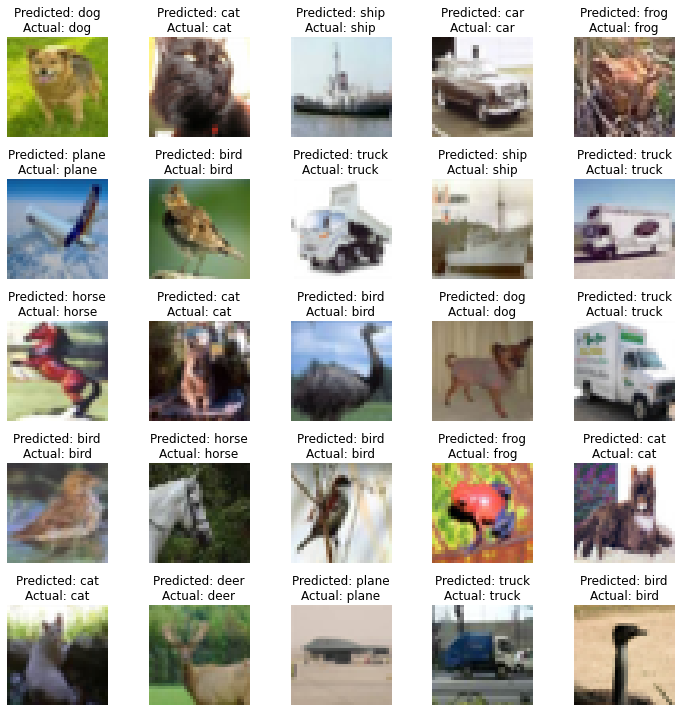

In [16]:
plot_images(correct_imgs, data.classes, "correct_imgs.png")

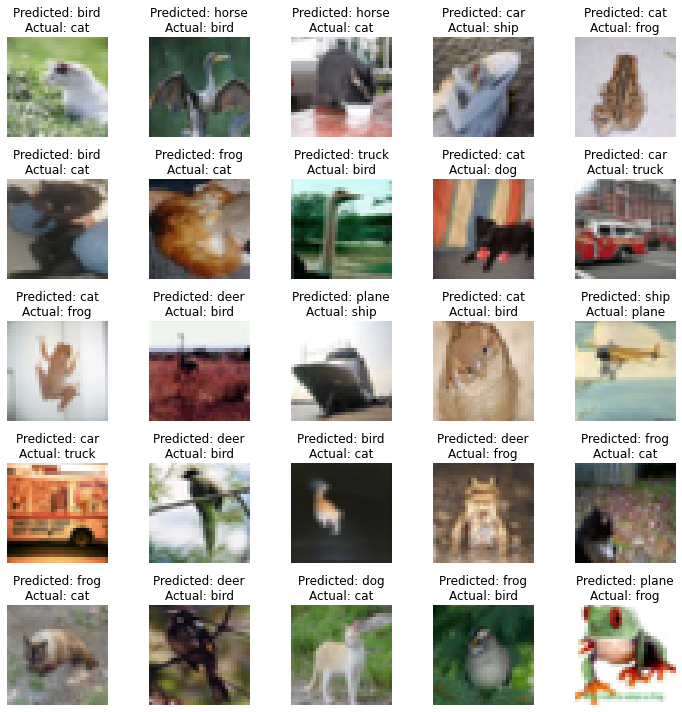

In [17]:
plot_images(misclassified_imgs, data.classes, "misclassified_imgs.png")

In [0]:
GradCam = SourceFileLoader('GradCam',join('/content/drive/My Drive/Colab Notebooks/S9','GradCam.py')).load_module()
import GradCam

In [26]:
visualize = SourceFileLoader('visualize',join('/content/drive/My Drive/Colab Notebooks/S9','visualize.py')).load_module()
from visualize import VisualizeCam
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,data.classes, target_layers)

TypeError: ignored